In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [53]:
df = pd.read_csv('/home/aayushjoshi/ML/projects/weather-prediction-end-to-end/dataset/raw_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43841 entries, 0 to 43840
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    43841 non-null  object 
 1   temp    43841 non-null  float64
 2   dwpt    43841 non-null  float64
 3   rhum    43841 non-null  float64
 4   prcp    43824 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    43841 non-null  float64
 7   wspd    43841 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    43841 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    43639 non-null  float64
dtypes: float64(11), object(1)
memory usage: 4.0+ MB


In [54]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2019-02-22 00:00:00,13.3,-3.9,30.0,0.0,NaN,340.0,7.6,NaN,1020.2,NaN,3.0
1,2019-02-22 01:00:00,13.3,-4.4,29.0,0.0,NaN,350.0,0.0,NaN,1020.9,NaN,3.0
2,2019-02-22 02:00:00,11.1,-2.3,39.0,0.0,NaN,350.0,16.6,NaN,1021.6,NaN,3.0
3,2019-02-22 03:00:00,10.6,-2.1,41.0,0.0,NaN,350.0,13.0,NaN,1022.1,NaN,3.0
4,2019-02-22 04:00:00,9.4,-1.6,46.0,0.0,NaN,360.0,13.0,NaN,1022.9,NaN,4.0


In [55]:
df.tail()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
43836,2024-02-22 12:00:00,3.0,-0.8,76.0,0.0,NaN,167.0,7.4,NaN,1019.2,NaN,3.0
43837,2024-02-22 13:00:00,4.2,-0.2,73.0,0.0,NaN,170.0,9.3,NaN,1018.3,NaN,3.0
43838,2024-02-22 14:00:00,5.4,0.4,70.0,0.0,NaN,172.0,13.0,NaN,1017.4,NaN,3.0
43839,2024-02-22 15:00:00,6.6,0.7,66.0,0.0,NaN,172.0,13.0,NaN,1016.2,NaN,3.0
43840,2024-02-22 16:00:00,7.5,0.7,62.0,0.0,NaN,173.0,14.8,NaN,1014.7,NaN,3.0


In [56]:
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,43841.000000,43841.000000,43841.000000,43824.000000,0.0,43841.000000,43841.000000,0.0,43841.000000,0.0,43639.000000
mean,15.654953,8.064622,63.359184,0.130122,NaN,186.938938,13.328455,NaN,1017.561937,NaN,3.642384
std,9.331765,9.954660,18.640536,0.849977,NaN,111.949467,7.778684,NaN,7.252934,NaN,2.671113
min,-12.800000,-21.800000,12.000000,0.000000,NaN,0.000000,0.000000,NaN,981.400000,NaN,0.000000
25%,8.300000,0.000000,48.000000,0.000000,NaN,90.000000,7.600000,NaN,1012.800000,NaN,2.000000
50%,16.100000,8.900000,64.000000,0.000000,NaN,190.000000,13.000000,NaN,1017.400000,NaN,3.000000
75%,23.300000,16.700000,79.000000,0.000000,NaN,300.000000,18.400000,NaN,1022.300000,NaN,4.000000
max,37.200000,25.700000,100.000000,35.300000,NaN,360.000000,61.200000,NaN,1042.700000,NaN,26.000000


In [57]:
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

In [58]:
df.dropna(inplace=True, axis=1, how='all')

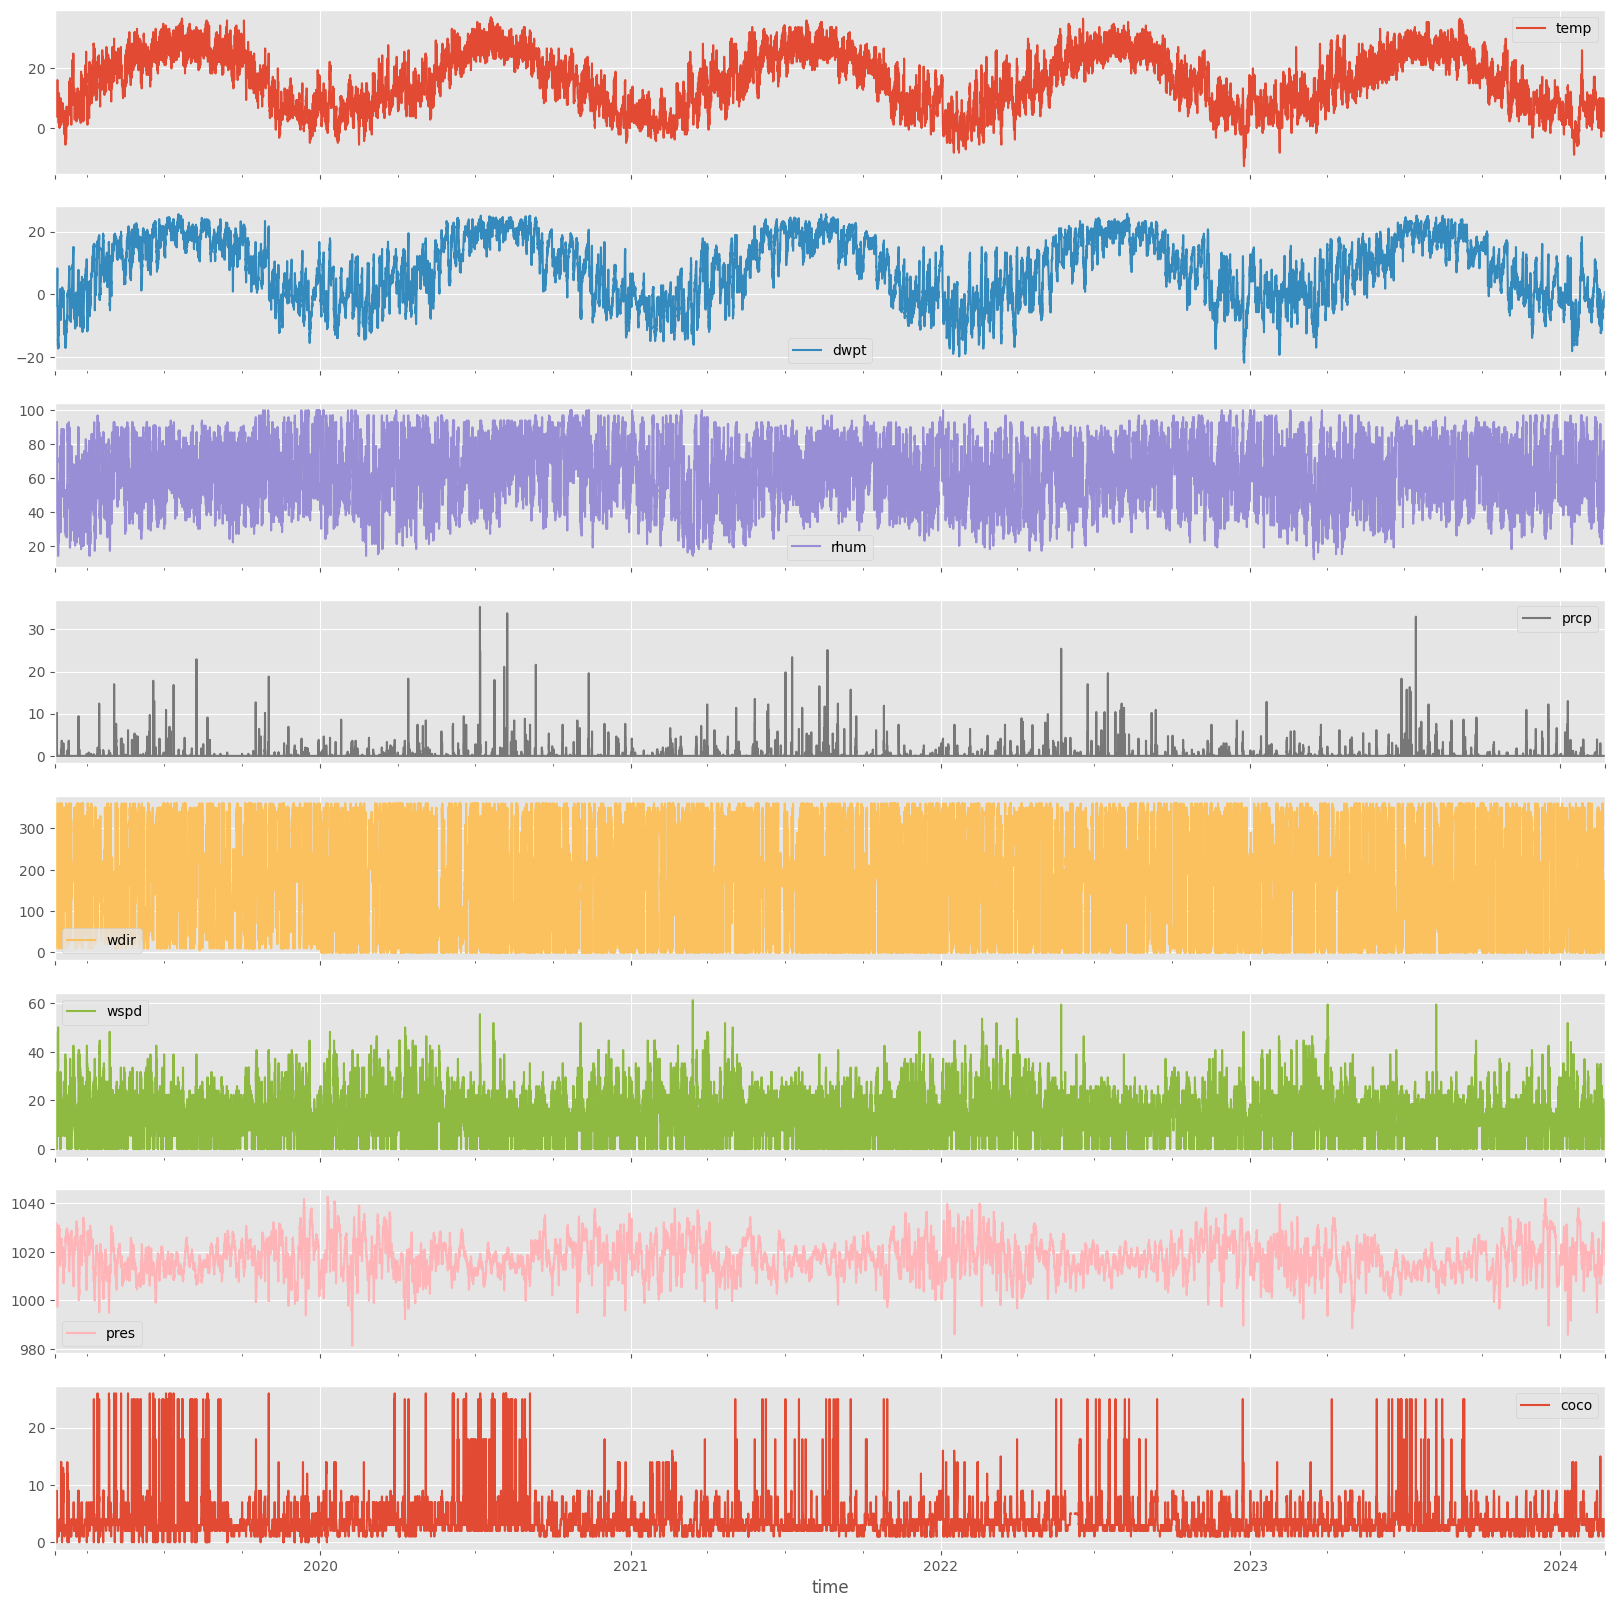

In [59]:
df.plot(subplots=True, figsize=(20,20))
plt.show()

after playing with the api we have realized that data hasnt been thoroughly collected so we would need to find since when we are able to find proper data and use that as the start date for our data collection

### creating time series features

we didn't specifically needed to create these features since we already have a good enough feature set

In [60]:
def create_features(df : pd.DataFrame) -> pd.DataFrame:
    """
    Creates time series feature from datetime index such as hour, day, month, year.
    """
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year  
    df['hour'] = df.index.hour
    return df

In [61]:
df  = create_features(df)
no_of_features = df.shape[1] - 1

In [62]:
df.bfill(inplace=True)
df['coco'] = df['coco'].astype('int')
df = df.join(pd.get_dummies(df['coco'], dtype='int')).drop('coco', axis=1).rename(columns={0:'Clear',1:'Fair',2:'Cloudy',3:'Overcast',4:'Fog',5:'Freezing Fog',6:'Light Rain',7:'Rain',8:'Heavy Rain',9:'Freezing Rain',10:'Heavy Freezing Rain',11:'Sleet',12:'Heavy Sleet',13:'Light Snowfall',14:'Snowfall',15:'Heavy Snowfall',16:'Rain Shower',17:'Heavy Rain Shower',18:'Sleet Shower',19:'Heavy Sleet Shower',20:'Snow Shower',21:'Heavy Snow Shower',22:'Lightning',23:'Hail',24:'Thunderstorm',25:'Heavy Thunderstorm',26:'Storm'})

In [63]:
features = df.columns[:no_of_features]
labels = df.columns[no_of_features:]

### train test split 
we went for a 80 20 split

In [64]:
start_date = datetime(datetime.now().year - 5, datetime.now().month, datetime.now().day)
split_date = datetime(datetime.now().year - 1, datetime.now().month, datetime.now().day)
end_date = datetime.now()
# these dates has to be modified according to the dataset and the time period of the dataset

print(f"Shape of X : {df[features].shape}")
print(f"Shape of y : {df[labels].shape}")

X_train = df.loc[start_date:split_date][features]
X_test = df.loc[split_date:end_date][features]
y_train = df.loc[start_date:split_date][labels]
y_test = df.loc[split_date:end_date][labels]

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35065, 11), (8777, 11), (35065, 21), (8777, 21))

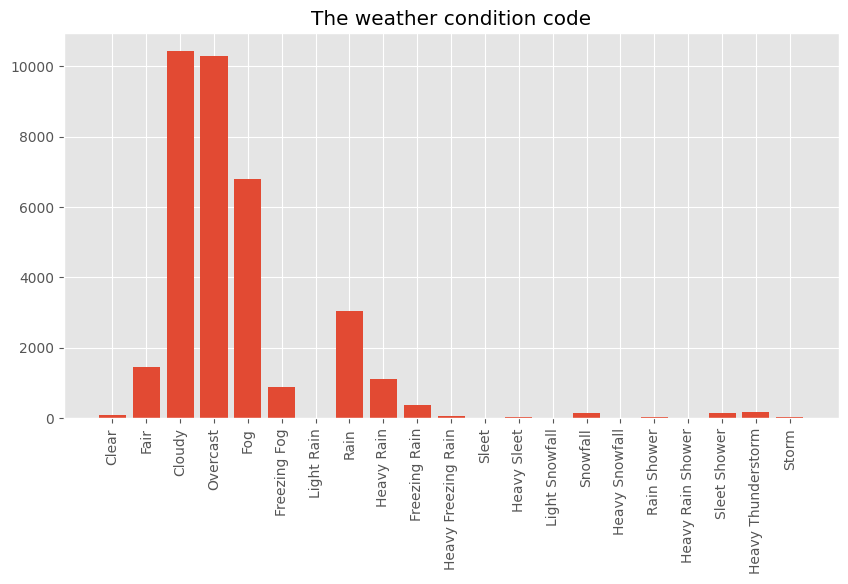

In [67]:
plt.figure(figsize=(10,5))
plt.bar(y_train.columns,y_train.sum().values)
plt.title('The weather condition code')
plt.xticks(rotation=90)
plt.show()